In [135]:
import os
import re
import itertools
import pickle
from collections import Counter,defaultdict
try:
	import pandas as pd
	import numpy as np
	from nltk.corpus import stopwords
    
	from nltk.stem import PorterStemmer
	import gensim
	from gensim.models import Word2Vec
	from nltk.stem import WordNetLemmatizer
	from keras.utils import np_utils
except:
	print("require modules: keras,gensim,nltk.stem,nltk.corpus,nltk.stem, please install it.")
	exit()

In [136]:
reg1 = re.compile("\.txt$")
reg2 = re.compile("([0-9]+)\.txt")
reg3 = re.compile(".*_([0-9])\.txt")
reg4 = re.compile("\[.+\]")
reg5 = re.compile("info\.txt")
lyrics_dic = {}
#iter all directory and load all song(txt file)
for i in os.listdir():
    if os.path.isdir(i):
        for path,sub,items in os.walk(i):
            if any([reg1.findall(item) for item in items]):
                for item in items:
                    if reg5.findall(item):
                        continue
                    if reg3.findall(item):
                        num = ["0"+reg3.findall(item)[0]]
                        name = "_".join(path.split("/") + num)
                    else:
                        name = "_".join(path.split("/") + reg2.findall(item))

                    with open(os.path.join(path,item),"r",encoding="utf8", errors='ignore') as f:
                        lyrics = "".join(f.readlines())
                        lyrics = reg4.subn("",lyrics)[0]
                        lyrics_dic[name] = lyrics

In [137]:
len(lyrics_dic.keys())

777

In [138]:
df=pd.DataFrame(columns=["lyrics","mood"])

In [139]:
for key in lyrics_dic.keys():
    #print(key)
    if "Happy" in key:
        
        df=df.append({"lyrics":lyrics_dic[key],"mood":"1"},ignore_index=True)
    elif "Sad" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"2"},ignore_index=True)
    elif "Angry" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"3"},ignore_index=True)
    elif "Relaxed" in key:
        df=df.append({"lyrics":lyrics_dic[key],"mood":"4"},ignore_index=True)

In [140]:
df.head()

,lyrics,mood
0,Put your lips close to mine\nAs long as they d...,1
1,"My lullaby,hung out to dry\nWhat's up with tha...",1
2,Though you've played at love and lost\nAnd sor...,1
3,we know we are the ones\nwho do it numb again\...,1
4,Another day has come and gone\nThey fade away ...,1


In [141]:
df = df.sample(frac=1).reset_index(drop=True)

In [142]:
df_new=pd.read_csv("df_mood_backup.csv")

In [143]:
df_new.tail()

,Unnamed: 0,file,artist,title,lyrics,tags,mood
600,9913,TRAREDZ12903CFB6E3.h5,Pelle Carlberg,Clever Girls Like Clever Boys Much More Than C...,You should have listened to what mama said\nAn...,"['handclaps', 'title is a full sentence', 'ind...",1
601,9943,TRATTMT128F149167B.h5,Michael Jackson,Ain't No Sunshine,Spoken Intro:\nYou ever want something\nThat y...,"['soul', 'michael jackson', '70s', 'pop', 'cov...",2
602,9966,TRAWFGF128E0792FE0.h5,Extreme,Stop The World,All the world's a masquerade\nMade up of fools...,"['hard rock', 'rock', 'funk metal', 'Power bal...",2
603,9967,TRAWFVE128F42912CA.h5,Dimmu Borgir,Sympozium,Chains of despair cloacked by darkness\nThe th...,"['Symphonic Black Metal', 'black metal', 'melo...",3
604,9969,TRBDMIN128F147FCBB.h5,Phil Collins,One More Night,One more night\nOne more night\n\nI've been tr...,"['80s', 'pop', 'Phil Collins', 'soft rock', 'r...",2


In [144]:
df_new=df_new[["lyrics","mood"]]

In [145]:
df3=df.append(df_new,ignore_index=True)

In [146]:
df3["mood"]=df3["mood"].apply(str)

In [147]:
set(df3["mood"].values)
df=df3

In [148]:
df.shape

(1382, 2)

In [149]:
df_new=pd.read_excel("test.xls")

In [150]:
df_new.shape

(235, 5)

In [151]:
df_new=df_new[['lyrics','mood']]
df_new=df_new.dropna()

In [152]:
# df_new['Mood']=pd.to_numeric(df_new['Mood'],downcast='integer')
df_new['mood']=df_new['mood'].astype(int)

In [153]:
df_new['mood'].value_counts()
df_new["mood"]=df_new["mood"].apply(str)

In [154]:
df=df.append(df_new.sample(n=100),ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
set(df["mood"].values)

{'1', '2', '3', '4'}

In [157]:
df.to_csv('training_backup.csv',index=False)
df_new.to_csv('testing_backup.csv',index=False)

In [159]:
dfk=pd.read_csv("testing_backup.csv")
dfk.shape

(234, 2)

In [83]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/manojitpc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manojitpc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [85]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

In [86]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

In [87]:
df.tail()

,lyrics,mood
1477,"[oh-oh, oh-oh, woo-oh, oh-oh, oh-oh, woo-oh, n...",1
1478,"[ooo, ,, you, say, you, 're, feelin, ', bad, '...",2
1479,"[born, to, multiply, ,, born, to, gaze, into, ...",1
1480,"[this, is, dedicated, to, the, one, i, love, ....",1
1481,"[these, words, are, my, own, threw, some, chor...",1


In [88]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

In [89]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/manojitpc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [90]:

data=df_new[["text_final","Mood"]]
data_x=df_new["text_final"]
data_y=df_new["Mood"]

KeyError: "['Mood'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(data_x, data_y, test_size=0.3, random_state=0)

In [ ]:
df_new.dropna()
df_new.shape


In [91]:
train_x = df['text_final']
valid_x = df_new['text_final'][:233]
train_y = df['mood']
valid_y = df_new['mood'][:233]

In [92]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [93]:

all_texts = []

for items in train_x:
    all_texts.append(items)
    
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['admit', 'blue', 'forgotten', 'learn', 'something', 'one', 'blame', 'forgiven', 'far', 'sweet', 'boy', 'like', 'chorus', 'look', 'wonder', 'might', 'happy', 'alone', 'find', 'boy', 'soon', 'see', 'friend', 'almost', 'everyday', 'never', 'glimpse', 'kay', 'go', 'shop', 'alone', 'pick', 'happy', 'need', 'someone', 'tell', 'mistake', 'ca', 'happy', 'ca', 'imagine', 'without', 'chorus', 'look', 'wonder', 'might', 'happy', 'alone', 'find', 'boy', 'soon', 'nouvelle', 'lyric', 'index']


In [94]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy,xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [95]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [96]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

In [97]:
#tfidf_vect = TfidfVectorizer(analyzer='word',max_features=7000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [98]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [99]:
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)

accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

NB, Count Vectors:  0.5278969957081545
NB, WordLevel TF-IDF:  0.4334763948497854
NB, N-Gram Vectors:  0.5450643776824035


In [100]:
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.5579399141630901
RF, WordLevel TF-IDF Vectors:  0.5793991416309013
RF, N-Gram Vectors:  0.5236051502145923


In [101]:
accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy_count_lc)

accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy_ngram_lc)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR, Count Vectors:  0.5364806866952789
LR, WordLevel TF-IDF:  0.5536480686695279
LR, N-Gram Vectors:  0.5150214592274678


In [102]:
accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy_count_bo)

accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

Xgb, Count Vectors:  0.4721030042918455
Xgb, WordLevel TF-IDF:  0.4978540772532189
Xgb, Ngram Level Vectors:  0.34763948497854075


In [103]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.5407725321888412
RF, WordLevel TF-IDF:  0.5278969957081545


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Ngram Vectors:  0.4721030042918455


In [104]:

import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','relaxed'],
            xticklabels=['happy','sad','angry','relaxed'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


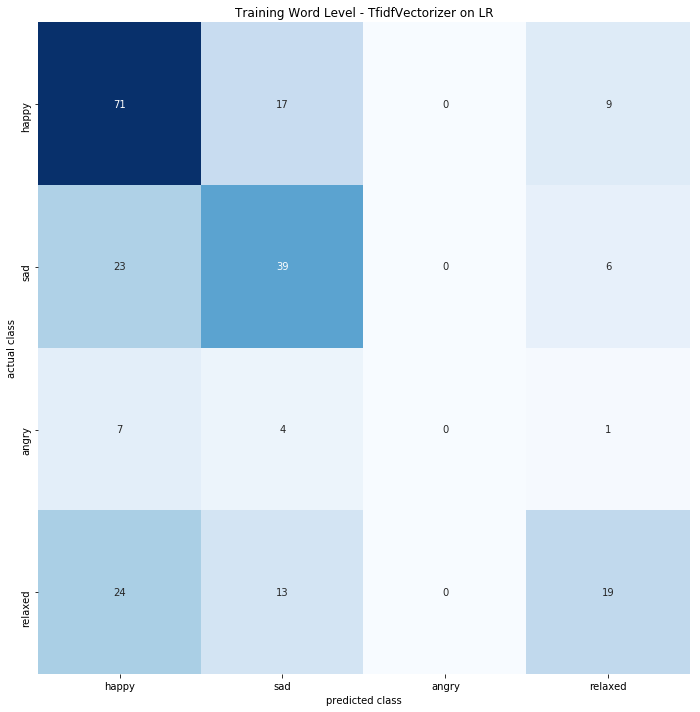

In [105]:

import seaborn as sns
import matplotlib.pyplot as plt

claf = linear_model.LogisticRegression()
claf.fit(xtrain_tfidf, train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on LR')